In [6]:
import pandas as pd

data = pd.read_csv('cleaned_data.csv')

In [8]:
data.head()

,Country Name,year,Access to electricity (% of population),CO2 emissions (metric tons per capita),GDP (constant 2015 US$)
0,Argentina,2016 [YR2016],99.849579,4.201846,5.823766e+11
1,Argentina,2017 [YR2017],100.000000,4.071308,5.987909e+11
2,Argentina,2018 [YR2018],99.989578,3.975772,5.831181e+11
3,Argentina,2019 [YR2019],100.000000,3.740650,5.713045e+11
4,Argentina,2020 [YR2020],100.000000,NaN,5.147724e+11


In [10]:
# First we rename 'year' to 'Year', somehow I forgot it yesterday
data.rename(columns = {'year':'Year'}, inplace = True)

In [12]:
# Then we make the year be just integers
data['Year'] = data['Year'].str.extract(r'(\d{4})')
data['Year'] = data['Year'].astype('int')

In [14]:
data.head()

,Country Name,Year,Access to electricity (% of population),CO2 emissions (metric tons per capita),GDP (constant 2015 US$)
0,Argentina,2016,99.849579,4.201846,5.823766e+11
1,Argentina,2017,100.000000,4.071308,5.987909e+11
2,Argentina,2018,99.989578,3.975772,5.831181e+11
3,Argentina,2019,100.000000,3.740650,5.713045e+11
4,Argentina,2020,100.000000,NaN,5.147724e+11


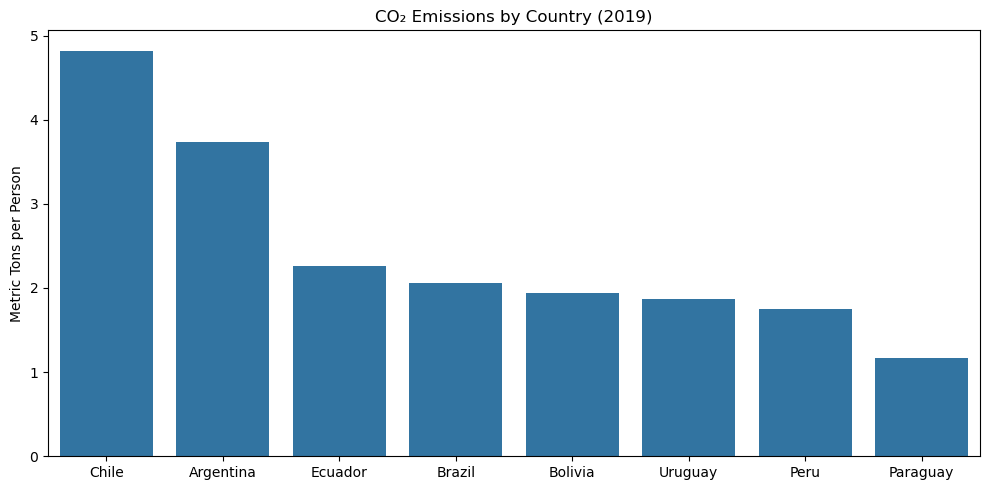

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# We now focus on only 2019, want to see who has the most emissions
co2_2019 = data[data['Year'] == 2019].copy()
co2_2019 = co2_2019.sort_values(by = 'CO2 emissions (metric tons per capita)', ascending = False)

# Let's use barplot
plt.figure(figsize = (10, 5))

sns.barplot(data = co2_2019, x  = 'Country Name', y = 'CO2 emissions (metric tons per capita)')

plt.title('CO₂ Emissions by Country (2019)')
plt.ylabel('Metric Tons per Person')
plt.xlabel('')
plt.tight_layout()
plt.show()

### Observations:

- **Chile** has the highest per capita CO₂ emissions, reaching nearly **5 metric tons per person**.
- **Argentina** follows closely with almost **4 metric tons per person**.
- Most other countries (excluding Chile, Argentina, and Paraguay) are clustered around **2 metric tons**, showing relatively small differences among them.
- **Paraguay** has the lowest emissions, slightly above **1 metric ton per person**.

### Interpretation:

- Chile and Argentina leading in per capita emissions is not surprising, given their larger economies within South America.
- **Brazil's lower per capita emissions** may seem unexpected, but this can be attributed to its **large population**, which dilutes total emissions.

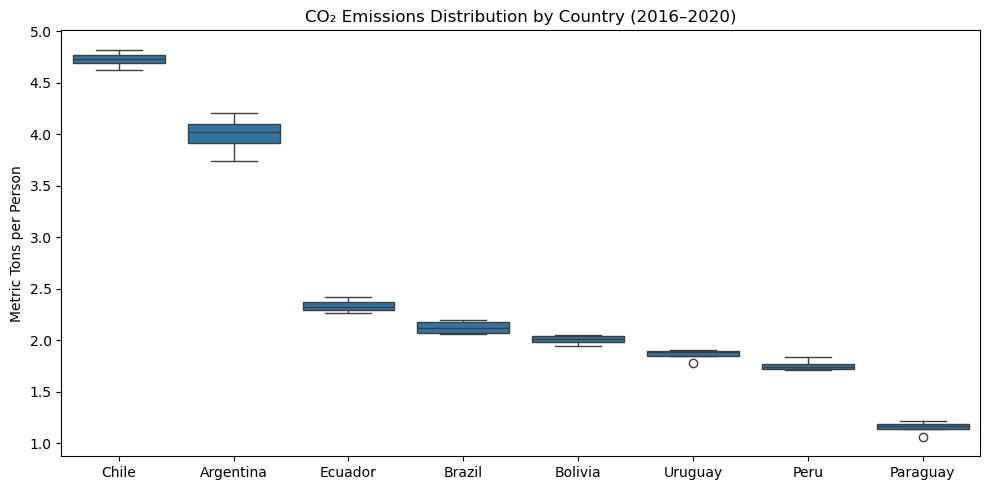

In [56]:
# Now not only 2019, and use boxplot instead.
plt.figure(figsize = (10, 5))

sns.boxplot(data = data, x = 'Country Name', y = 'CO2 emissions (metric tons per capita)', order = co2_2019['Country Name'])

plt.title('CO₂ Emissions Distribution by Country (2016–2020)')
plt.ylabel('Metric Tons per Person')
plt.xlabel('')
plt.tight_layout()
plt.show()

### Observations:

- The relative ranking of countries remains consistent across the five years.
- Most countries exhibit **low variability** in their CO₂ emissions, resulting in relatively compressed boxplots.
- **Chile** and **Argentina** show more visible spread, with Argentina having the largest variation, up to **~0.5 metric tons difference** between min and max.
- **Paraguay** stands out as having consistently low emissions, even lower than what was apparent in the bar chart. This might suggest **some factors** influencing its emissions.

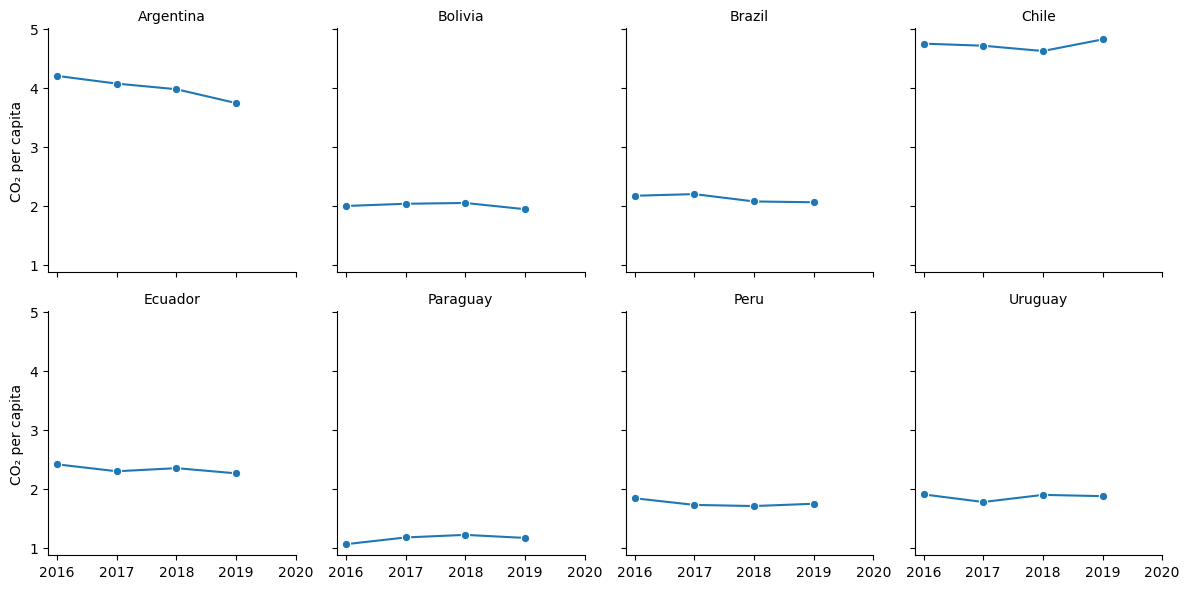

In [54]:
# Initializing, now we make it seperated.
g = sns.FacetGrid(data, col = 'Country Name', col_wrap = 4, height = 3)

# We use lineplot to see how the things are going through the years
g.map_dataframe(sns.lineplot, x = 'Year', y = 'CO2 emissions (metric tons per capita)', marker = 'o')

g.set_titles('{col_name}')
g.set_axis_labels('', 'CO₂ per capita')
g.set(xticks = [2016, 2017, 2018, 2019, 2020])
plt.tight_layout()
plt.show()

### Observations:

- **Argentina** shows a clear downward trend in per capita emissions from 2016 to 2019.
- **Chile** remains relatively stable, with emissions increasing toward the end.
- **Other countries** exhibit only minor year-to-year variations and appear mostly stable.

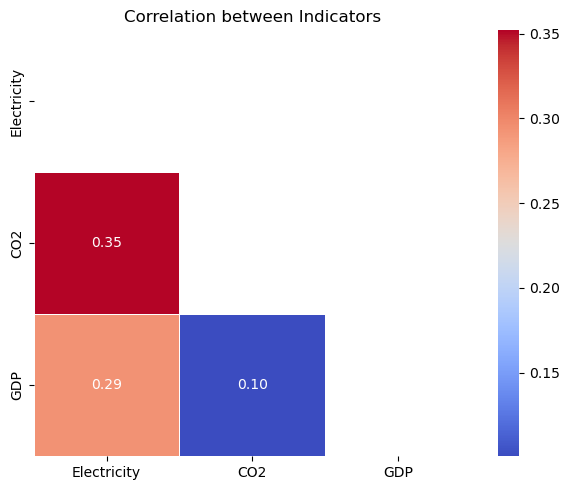

In [77]:
import numpy as np

# Simplified columns name
corr_data = data[['Access to electricity (% of population)', 'CO2 emissions (metric tons per capita)', 'GDP (constant 2015 US$)']].copy()
corr_data.columns = ['Electricity', 'CO2', 'GDP']

# Calculating correlation
corr_matrix = corr_data.corr()

# Making mask to only show lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize = (6, 5))

sns.heatmap(corr_matrix, mask = mask, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)

plt.title('Correlation between Indicators')
plt.tight_layout()
plt.show()

### Observations:

- The heatmap presents the same Pearson correlation matrix as previously calculated.
- The only difference lies in visual formatting: only the **lower triangle** is shown, with simplified labels and clearer layout.
- As before, the correlation values remain surprisingly low across all indicator pairs.